## **Ex. No. 23 - PREDICT HEART DISEASE USING BASIC MACHINE LEARNING MODELS**

---
Niranjana A

220301061

III BME - "A"

---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/heart_cleveland_upload.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
#Split the data into training and testing sets
X = df.drop('condition', axis=1)  # Features (all columns except 'target')
y = df['condition']  # Target variable (heart disease presence)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

# Logistic Regression evaluation
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)
lr_f1 = f1_score(y_test, lr_predictions)

# Naive Bayes evaluation
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions)
nb_recall = recall_score(y_test, nb_predictions)
nb_f1 = f1_score(y_test, nb_predictions)

# Print the evaluation metrics
print("Logistic Regression Metrics:")
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1-score:", lr_f1)

print("\nNaive Bayes Metrics:")
print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1-score:", nb_f1)

Logistic Regression Metrics:
Accuracy: 0.7333333333333333
Precision: 0.7
Recall: 0.75
F1-score: 0.7241379310344828

Naive Bayes Metrics:
Accuracy: 0.7666666666666667
Precision: 0.7058823529411765
Recall: 0.8571428571428571
F1-score: 0.7741935483870968


In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, lr_predictions)
cm_nb = confusion_matrix(y_test, nb_predictions)
print("Logistic Regression Confusion Matrix:")
print(cm_lr)
print("\nNaive Bayes Confusion Matrix:")
print(cm_nb)

Logistic Regression Confusion Matrix:
[[23  9]
 [ 7 21]]

Naive Bayes Confusion Matrix:
[[22 10]
 [ 4 24]]


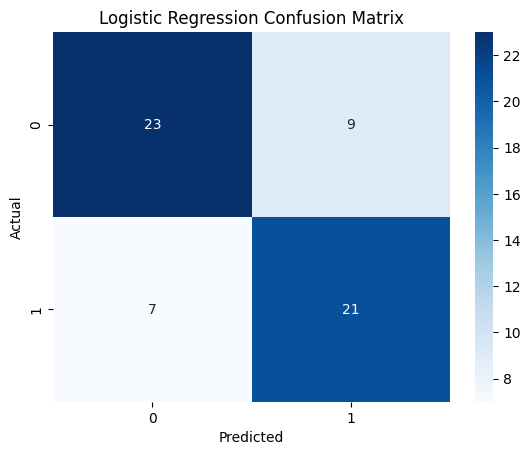

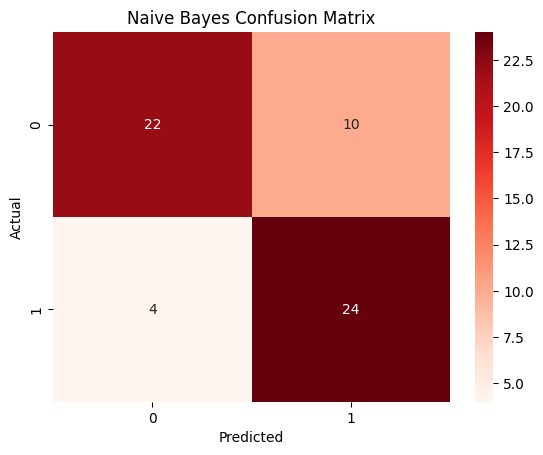

In [ ]:
#plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

sns.heatmap(cm_nb, annot=True, fmt='d', cmap="Reds")
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()